In [9]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

# The Data
## A Labeled Data Set

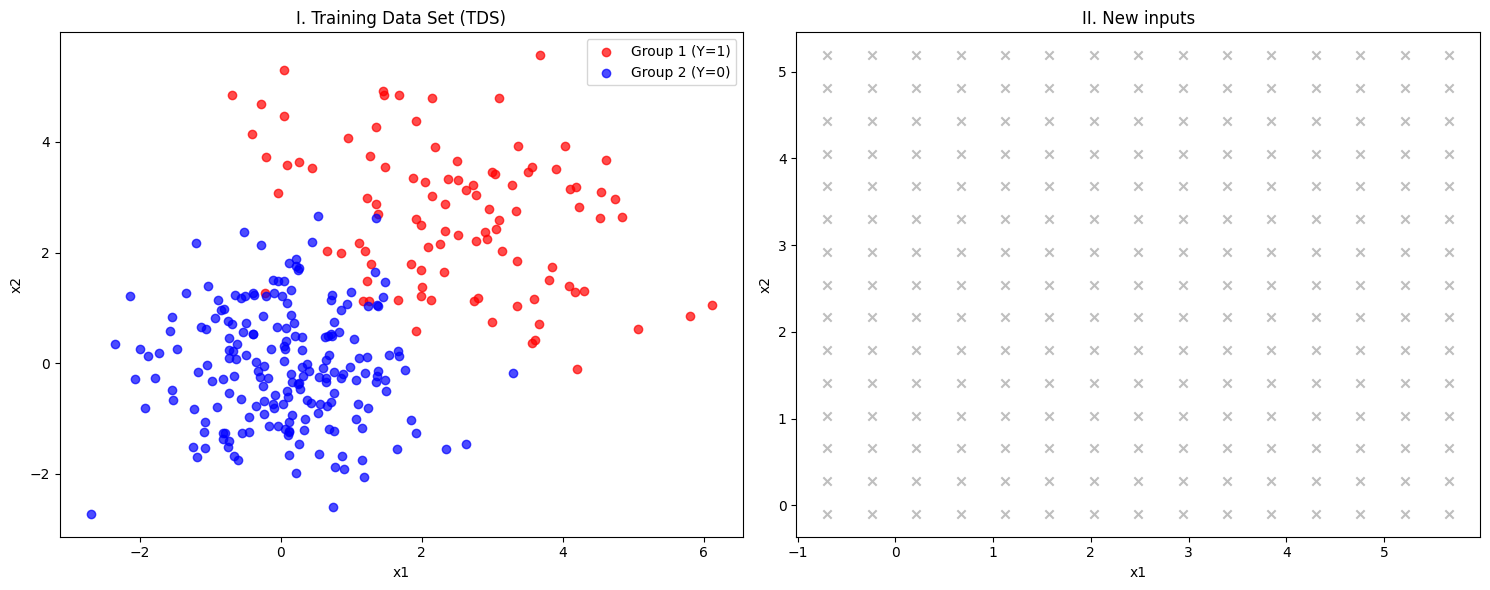

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# +++++++++ From TP1 ++++++++++++ 

# Initialize parameters for Group 1
n1 = 100
mean1 = (2.5, 2.5)
mat_cov1 = [[2, -0.8], [-0.8, 2]]

# Initialize parameters for Group 2
n2 = 200
mean2 = (0, 0)
mat_cov2 = [[1, 0], [0, 1]]

# Generate random samples for both groups
grp1 = np.random.multivariate_normal(mean1, mat_cov1, n1)
grp2 = np.random.multivariate_normal(mean2, mat_cov2, n2)

# Create a figure with two subplots side by side
figure, axes = plt.subplots(1, 2, figsize=(15, 6))

# -------------------- Subplot 1: Training Data Set (TDS) --------------------
ax1 = axes[0]
ax1.scatter(grp1[:, 0], grp1[:, 1], c="red", label="Group 1 (Y=1)", alpha=0.7)
ax1.scatter(grp2[:, 0], grp2[:, 1], c="blue", label="Group 2 (Y=0)", alpha=0.7)
ax1.set_title('I. Training Data Set (TDS)')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.legend()

# -------------------- Subplot 2: Evaluation Grid --------------------
ax2 = axes[1]

# Determine the combined range for the grid based on both groups
x1_min, x1_max = min(grp1[:,0]), max(grp1[:,0])
x2_min, x2_max = min(grp1[:,1]), max(grp1[:,1])
# N grid 
Neval = 15

h1 = (x1_max - x1_min) / Neval
h2 = (x2_max - x2_min) / Neval

# Create a meshgrid for evaluation
x1Eval, x2Eval = np.meshgrid(np.arange(x1_min, x1_max, h1),
                             np.arange(x2_min, x2_max, h2))
xx1 = x1Eval.ravel()
xx2 = x2Eval.ravel()
Xgrid = np.column_stack((xx1, xx2))

# Plot the evaluation grid
ax2.scatter(Xgrid[:, 0], Xgrid[:, 1], marker='x', color='gray', alpha=0.5)
ax2.set_title('II. New inputs')
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

# Adjust layout for better spacing
plt.tight_layout()

# Display the combined figure
plt.show()


# Split data

In [31]:
from sklearn.model_selection import train_test_split

In [48]:
X = np.concatenate((grp1, grp2), axis = 0) # axis = 0: adds to row
Y = ([1] * n1) + ([0] * n2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

In [50]:
print("Training set size:", X_train.shape)
print("Testing set size", X_test.shape)
print("\n")
print("Number of class 0 in training dataset:", Y_train.count(0))
print("Number of class 1 in training dataset:", Y_train.count(1))
print("Proportion of class 0 in training dataset:", Y_train.count(0)/len(Y_train))
print("Proportion of class 1 in training dataset:", Y_train.count(1)/len(Y_train))

Training set size: (200, 2)
Testing set size (100, 2)


Number of class 0 in training dataset: 139
Number of class 1 in training dataset: 61
Proportion of class 0 in training dataset: 0.695
Proportion of class 1 in training dataset: 0.305


# Classification Decision Tree

##  Model calibration

In [51]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [188]:
# instantiate model
tree = DecisionTreeClassifier()

# fit model
tree_fit = tree.fit(X, Y)

# predict on testing set
pY_train = tree_fit.predict_proba(X)

# score and decision on the training set
predxclass = np.argmax(pY_train, axis=1); 

#Accuracy
E_train = (Y != predxclass).sum()/len(Y)
print("Error on the complete training set:",E_train)

Error on the complete training set: 0.0


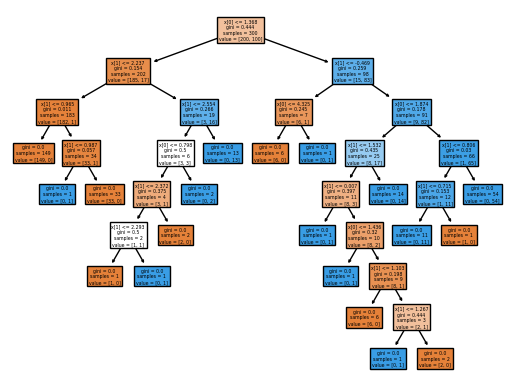

In [193]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(tree_fit, filled = True)
plt.show()

## Model description

In [65]:
from sklearn.tree import export_text
r = export_text(tree_fit)
print(r)

|--- feature_0 <= 1.37
|   |--- feature_1 <= 2.24
|   |   |--- feature_1 <= 0.96
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.96
|   |   |   |--- feature_1 <= 0.99
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.99
|   |   |   |   |--- class: 0
|   |--- feature_1 >  2.24
|   |   |--- feature_1 <= 2.55
|   |   |   |--- feature_0 <= 0.80
|   |   |   |   |--- feature_0 <= -0.41
|   |   |   |   |   |--- feature_1 <= 2.37
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  2.37
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  -0.41
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.80
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  2.55
|   |   |   |--- class: 1
|--- feature_0 >  1.37
|   |--- feature_1 <= -0.47
|   |   |--- feature_0 <= 4.32
|   |   |   |--- class: 0
|   |   |--- feature_0 >  4.32
|   |   |   |--- class: 1
|   |--- feature_1 >  -0.47
|   |   |--- feature_0 <= 1.87
|   |   |   |--- 

## Score and decision boundaries

Use the trained model to predict new grid data

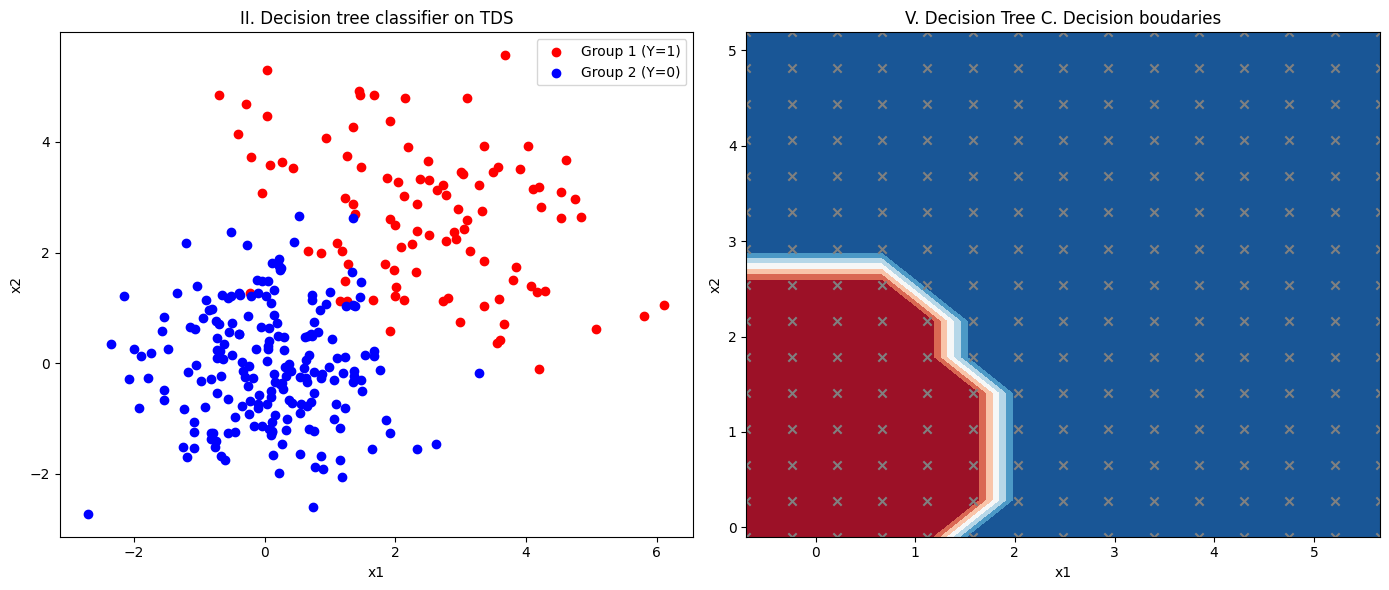

In [197]:
# -------------------- Create Grid for Decision Boundary --------------------

# -------------------- Plotting --------------------
figure, axes = plt.subplots(1, 2, figsize=(14, 6))

# -------------------- Subplot 1: Training Data Set --------------------
ax1 = axes[0]
ax1.scatter(grp1[:, 0], grp1[:, 1], c="red", label="Group 1 (Y=1)")
ax1.scatter(grp2[:, 0], grp2[:, 1], c="blue", label="Group 2 (Y=0)")
ax1.set_title('II. Decision tree classifier on TDS')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.legend()

# -------------------- Subplot 2: Decision Boundaries --------------------
ax2 = axes[1]

# Determine the combined range for the grid based on both groups
x1_min, x1_max = min(grp1[:,0]), max(grp1[:,0])
x2_min, x2_max = min(grp1[:,1]), max(grp1[:,1])
# N grid 
Neval = 15

h1 = (x1_max - x1_min) / Neval
h2 = (x2_max - x2_min) / Neval

# Create a meshgrid for evaluation
x1Eval, x2Eval = np.meshgrid(np.arange(x1_min, x1_max, h1),
                             np.arange(x2_min, x2_max, h2))
xx1 = x1Eval.ravel()
xx2 = x2Eval.ravel()
Xgrid = np.column_stack((xx1, xx2))
# Predict the class for each grid point
pY_grid = tree_fit.predict(Xgrid)
pY_grid = pY_grid.reshape(x1Eval.shape)

# Plot the decision boundary
ax2.contourf(x1Eval, x2Eval, pY_grid, cmap=plt.cm.RdBu)

# Plot the evaluation grid
ax2.scatter(Xgrid[:, 0], Xgrid[:, 1], marker='x', color='gray')
ax2.set_title('V. Decision Tree C. Decision boudaries')
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

## Meta parameters: split, leaf and deviance

In [123]:
print("Number of leaves:", tree_fit.get_n_leaves())
print("Depth of the tree:", tree_fit.get_depth())
tree_fit.get_params(deep=True)

Number of leaves: 19
Depth of the tree: 8


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

Set the minimum sample split parameter to 20 and the minimum sample leaf to 10

In [128]:
# instantiate model
tree = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=10)

# fit model
tree_fit = tree.fit(X, Y)

# predict on testing set
pY_train = tree_fit.predict_proba(X)

# score and decision on the training set
predxclass = np.argmax(pY_train, axis=1); 

#Accuracy
E_train = (Y != predxclass).sum()/len(Y)
print("Error on the complete training set:", E_train)

Error on the complete training set: 0.03333333333333333


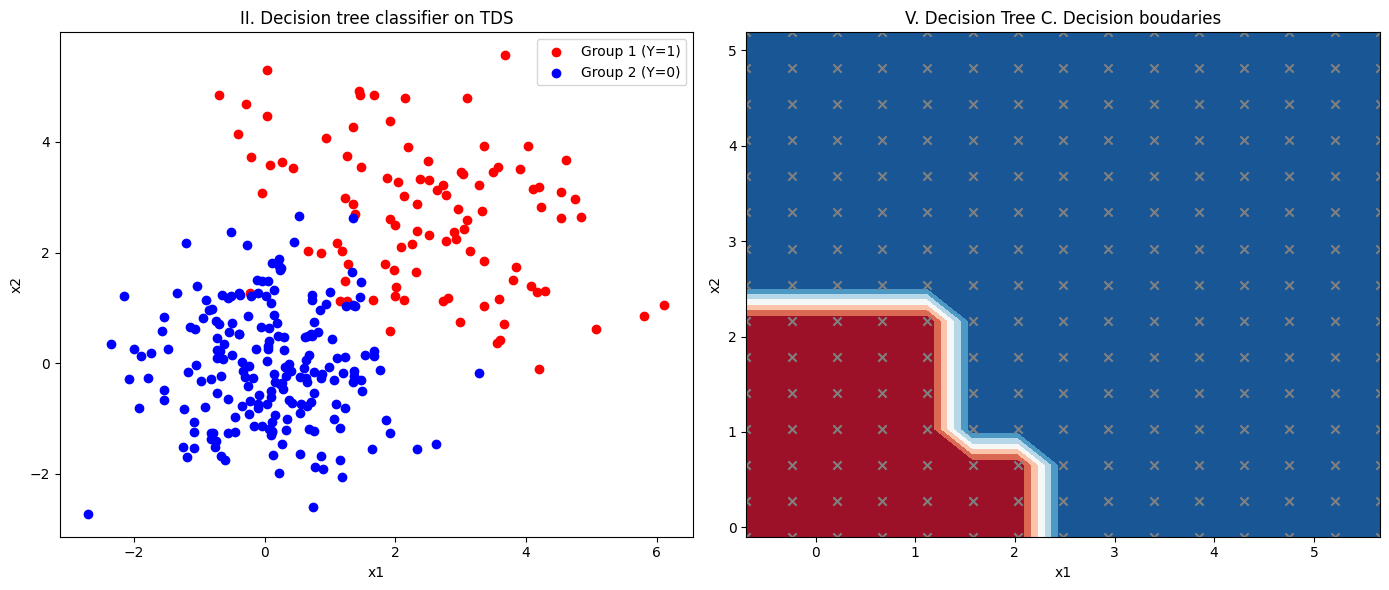

In [145]:
# -------------------- Create Grid for Decision Boundary --------------------

# -------------------- Plotting --------------------
figure, axes = plt.subplots(1, 2, figsize=(14, 6))

# -------------------- Subplot 1: Training Data Set --------------------
ax1 = axes[0]
ax1.scatter(grp1[:, 0], grp1[:, 1], c="red", label="Group 1 (Y=1)")
ax1.scatter(grp2[:, 0], grp2[:, 1], c="blue", label="Group 2 (Y=0)")
ax1.set_title('II. Decision tree classifier on TDS')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.legend()

# -------------------- Subplot 2: Decision Boundaries --------------------
ax2 = axes[1]

# Determine the combined range for the grid based on both groups
x1_min, x1_max = min(grp1[:,0]), max(grp1[:,0])
x2_min, x2_max = min(grp1[:,1]), max(grp1[:,1])
# N grid 
Neval = 15

h1 = (x1_max - x1_min) / Neval
h2 = (x2_max - x2_min) / Neval

# Create a meshgrid for evaluation
x1Eval, x2Eval = np.meshgrid(np.arange(x1_min, x1_max, h1),
                             np.arange(x2_min, x2_max, h2))
xx1 = x1Eval.ravel()
xx2 = x2Eval.ravel()
Xgrid = np.column_stack((xx1, xx2))
# Predict the class for each grid point
pY_grid = tree_fit.predict(Xgrid)
pY_grid = pY_grid.reshape(x1Eval.shape)

# Plot the decision boundary
ax2.contourf(x1Eval, x2Eval, pY_grid, cmap=plt.cm.RdBu)

# Plot the evaluation grid
ax2.scatter(Xgrid[:, 0], Xgrid[:, 1], marker='x', color='gray')
ax2.set_title('V. Decision Tree C. Decision boudaries')
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

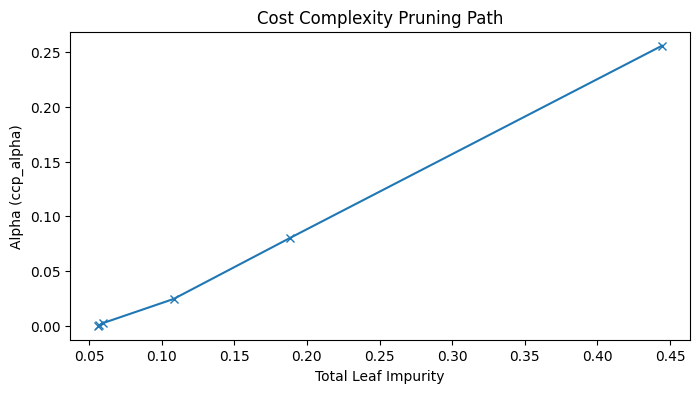

In [186]:
path = tree_fit.cost_complexity_pruning_path(X, Y)
alphas = path.ccp_alphas
impurities = path.impurities

plt.figure(figsize=(8,4))
plt.plot(impurities, alphas, marker = 'x')
plt.xlabel("Total Leaf Impurity")
plt.ylabel("Alpha (ccp_alpha)")
plt.title("Cost Complexity Pruning Path")
plt.show()

# Bagging

## Model calibration

In [132]:
from sklearn.ensemble import BaggingClassifier

In [147]:
# init bagging model
bag = BaggingClassifier(estimator = DecisionTreeClassifier(), n_estimators = 10, random_state = 0)

# fit model
bag_fit = bag.fit(X, Y)

# prediction
pY_train = bag_fit.predict_proba(X)
                                 
# score and decision on the training set
predxclass = np.argmax(pY_train, axis=1)

#Accuracy
E_train = (Y != predxclass).sum()/len(Y)
print("Error on the complete training set:", E_train)

Error on the complete training set: 0.016666666666666666


## Score and decision boundaries

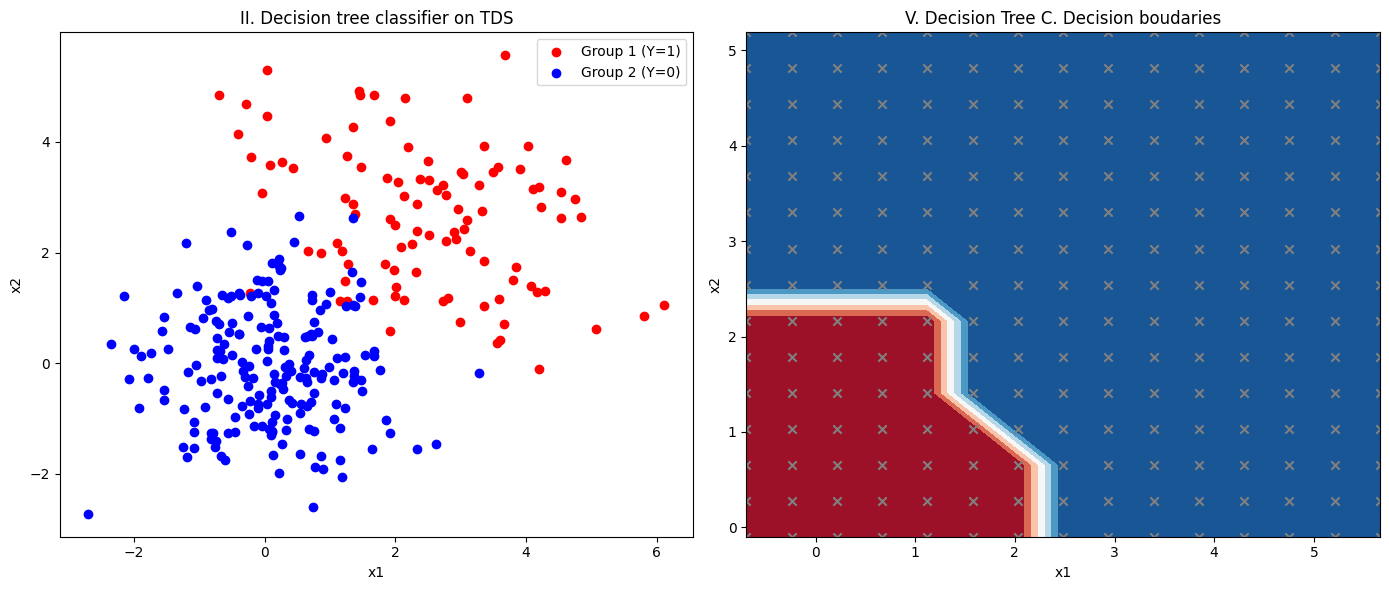

In [196]:
# -------------------- Create Grid for Decision Boundary --------------------

# -------------------- Plotting --------------------
figure, axes = plt.subplots(1, 2, figsize=(14, 6))

# -------------------- Subplot 1: Training Data Set --------------------
ax1 = axes[0]
ax1.scatter(grp1[:, 0], grp1[:, 1], c="red", label="Group 1 (Y=1)")
ax1.scatter(grp2[:, 0], grp2[:, 1], c="blue", label="Group 2 (Y=0)")
ax1.set_title('II. Decision tree classifier on TDS')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.legend()

# -------------------- Subplot 2: Decision Boundaries --------------------
ax2 = axes[1]

# Determine the combined range for the grid based on both groups
x1_min, x1_max = min(grp1[:,0]), max(grp1[:,0])
x2_min, x2_max = min(grp1[:,1]), max(grp1[:,1])
# N grid 
Neval = 15

h1 = (x1_max - x1_min) / Neval
h2 = (x2_max - x2_min) / Neval

# Create a meshgrid for evaluation
x1Eval, x2Eval = np.meshgrid(np.arange(x1_min, x1_max, h1),
                             np.arange(x2_min, x2_max, h2))
xx1 = x1Eval.ravel()
xx2 = x2Eval.ravel()
Xgrid = np.column_stack((xx1, xx2))
# Predict the class for each grid point
pY_grid = bag_fit.predict(Xgrid)
pY_grid = pY_grid.reshape(x1Eval.shape)

# Plot the decision boundary
ax2.contourf(x1Eval, x2Eval, pY_grid, cmap=plt.cm.RdBu)

# Plot the evaluation grid
ax2.scatter(Xgrid[:, 0], Xgrid[:, 1], marker='x', color='gray')
ax2.set_title('V. Decision Tree C. Decision boudaries')
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

## Meta parameters

In [150]:
bag_fit.get_params(deep=True)

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [151]:
# init bagging model
bag = BaggingClassifier(estimator = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=10), 
                        n_estimators = 10, 
                        random_state = 0)

# fit model
bag_fit = bag.fit(X, Y)

# prediction
pY_train = bag_fit.predict_proba(X)
                                 
# score and decision on the training set
predxclass = np.argmax(pY_train, axis=1)

#Accuracy
E_train = (Y != predxclass).sum()/len(Y)
print("Error on the complete training set:", E_train)

Error on the complete training set: 0.03666666666666667


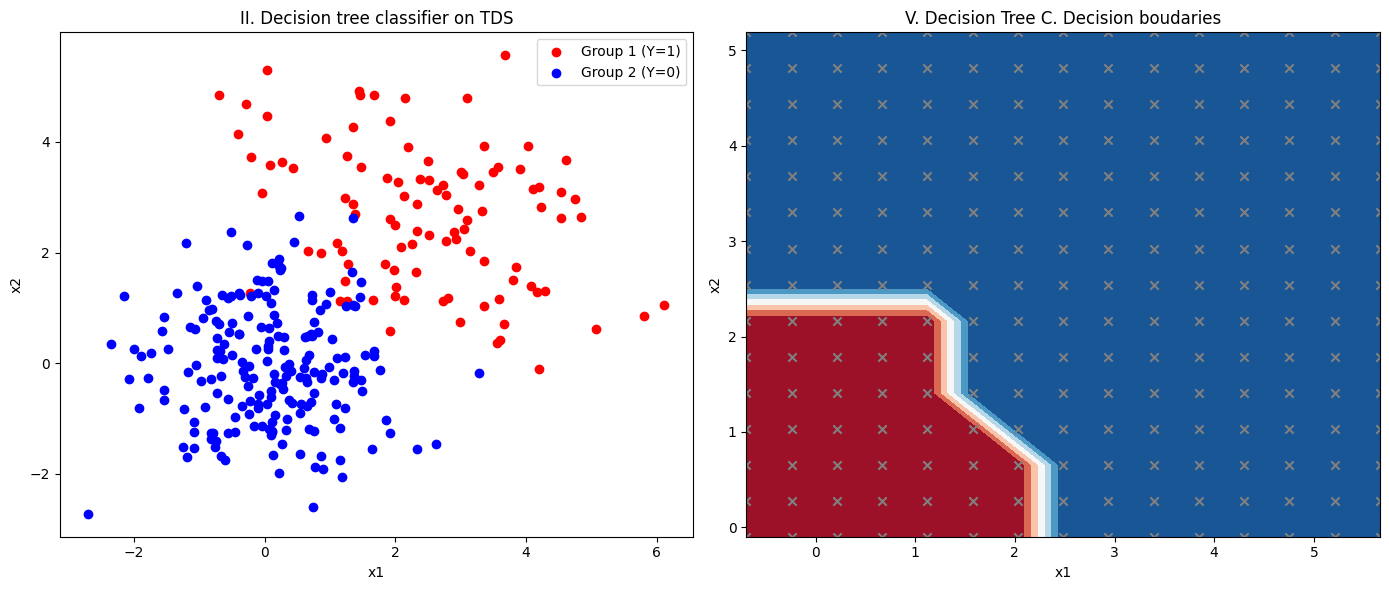

In [152]:
# -------------------- Create Grid for Decision Boundary --------------------

# -------------------- Plotting --------------------
figure, axes = plt.subplots(1, 2, figsize=(14, 6))

# -------------------- Subplot 1: Training Data Set --------------------
ax1 = axes[0]
ax1.scatter(grp1[:, 0], grp1[:, 1], c="red", label="Group 1 (Y=1)")
ax1.scatter(grp2[:, 0], grp2[:, 1], c="blue", label="Group 2 (Y=0)")
ax1.set_title('II. Decision tree classifier on TDS')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.legend()

# -------------------- Subplot 2: Decision Boundaries --------------------
ax2 = axes[1]

# Determine the combined range for the grid based on both groups
x1_min, x1_max = min(grp1[:,0]), max(grp1[:,0])
x2_min, x2_max = min(grp1[:,1]), max(grp1[:,1])
# N grid 
Neval = 15

h1 = (x1_max - x1_min) / Neval
h2 = (x2_max - x2_min) / Neval

# Create a meshgrid for evaluation
x1Eval, x2Eval = np.meshgrid(np.arange(x1_min, x1_max, h1),
                             np.arange(x2_min, x2_max, h2))
xx1 = x1Eval.ravel()
xx2 = x2Eval.ravel()
Xgrid = np.column_stack((xx1, xx2))
# Predict the class for each grid point
pY_grid = bag_fit.predict(Xgrid)
pY_grid = pY_grid.reshape(x1Eval.shape)

# Plot the decision boundary
ax2.contourf(x1Eval, x2Eval, pY_grid, cmap=plt.cm.RdBu)

# Plot the evaluation grid
ax2.scatter(Xgrid[:, 0], Xgrid[:, 1], marker='x', color='gray')
ax2.set_title('V. Decision Tree C. Decision boudaries')
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

# Random forest

## Model calibration

In [160]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

In [174]:
# init model
rf = RandomForestClassifier(max_depth=2, random_state=0, oob_score=True)

# fit model
rf_fit = rf.fit(X, Y)

# prediction
pY_train = rf_fit.predict_proba(X)

# score and decision on the training set
predxclass = np.argmax(pY_train, axis=1)

#Accuracy
E_train = (Y != predxclass).sum()/len(Y)
print("Error on the complete training set:", E_train)

Error on the complete training set: 0.03666666666666667


## Model criteria

In [187]:
score = rf.score(X, Y)
OOB = rf.oob_score_
IF = rf.feature_importances_

print("Accuracy:", score)
print("Out of bag score:", OOB)
print("Important features:", IF)

Accuracy: 0.9633333333333334
Out of bag score: 0.9466666666666667
Important features: [0.5208323 0.4791677]


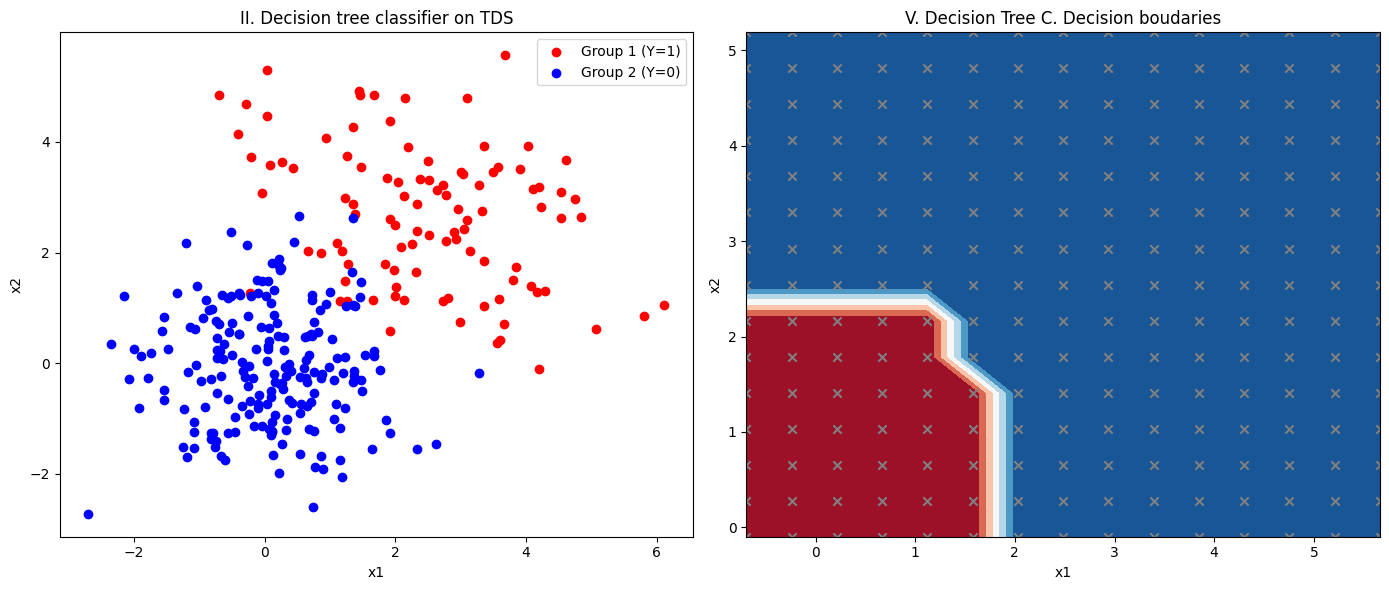

In [198]:
# -------------------- Create Grid for Decision Boundary --------------------
figure, axes = plt.subplots(1, 2, figsize=(14, 6))

# -------------------- Subplot 1: Training Data Set --------------------
ax1 = axes[0]
ax1.scatter(grp1[:, 0], grp1[:, 1], c="red", label="Group 1 (Y=1)")
ax1.scatter(grp2[:, 0], grp2[:, 1], c="blue", label="Group 2 (Y=0)")
ax1.set_title('II. Decision tree classifier on TDS')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.legend()

# -------------------- Subplot 2: Decision Boundaries --------------------
ax2 = axes[1]

# Determine the combined range for the grid based on both groups
x1_min, x1_max = min(grp1[:,0]), max(grp1[:,0])
x2_min, x2_max = min(grp1[:,1]), max(grp1[:,1])
# N grid 
Neval = 15

h1 = (x1_max - x1_min) / Neval
h2 = (x2_max - x2_min) / Neval

# Create a meshgrid for evaluation
x1Eval, x2Eval = np.meshgrid(np.arange(x1_min, x1_max, h1),
                             np.arange(x2_min, x2_max, h2))
xx1 = x1Eval.ravel()
xx2 = x2Eval.ravel()
Xgrid = np.column_stack((xx1, xx2))
# Predict the class for each grid point
pY_grid = rf_fit.predict(Xgrid)
pY_grid = pY_grid.reshape(x1Eval.shape)

# Plot the decision boundary
ax2.contourf(x1Eval, x2Eval, pY_grid, cmap=plt.cm.RdBu)

# Plot the evaluation grid
ax2.scatter(Xgrid[:, 0], Xgrid[:, 1], marker='x', color='gray')
ax2.set_title('V. Decision Tree C. Decision boudaries')
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

# Extra tree

In [199]:
#Random forest
from sklearn.ensemble import ExtraTreesClassifier

In [207]:
exTree = ExtraTreesClassifier(max_depth=2, random_state=0)
exTree_fit = exTree.fit(X, Y)
pY_train = exTree_fit.predict_proba(X)
predxclass = np.argmax(pY_train, axis=1)

In [208]:
score = rf.score(X, Y)
OOB = rf.oob_score_
IF = rf.feature_importances_

print("Accuracy:", score)
print("Out of bag score:", OOB)
print("Important features:", IF)

Accuracy: 0.9633333333333334
Out of bag score: 0.9466666666666667
Important features: [0.5208323 0.4791677]


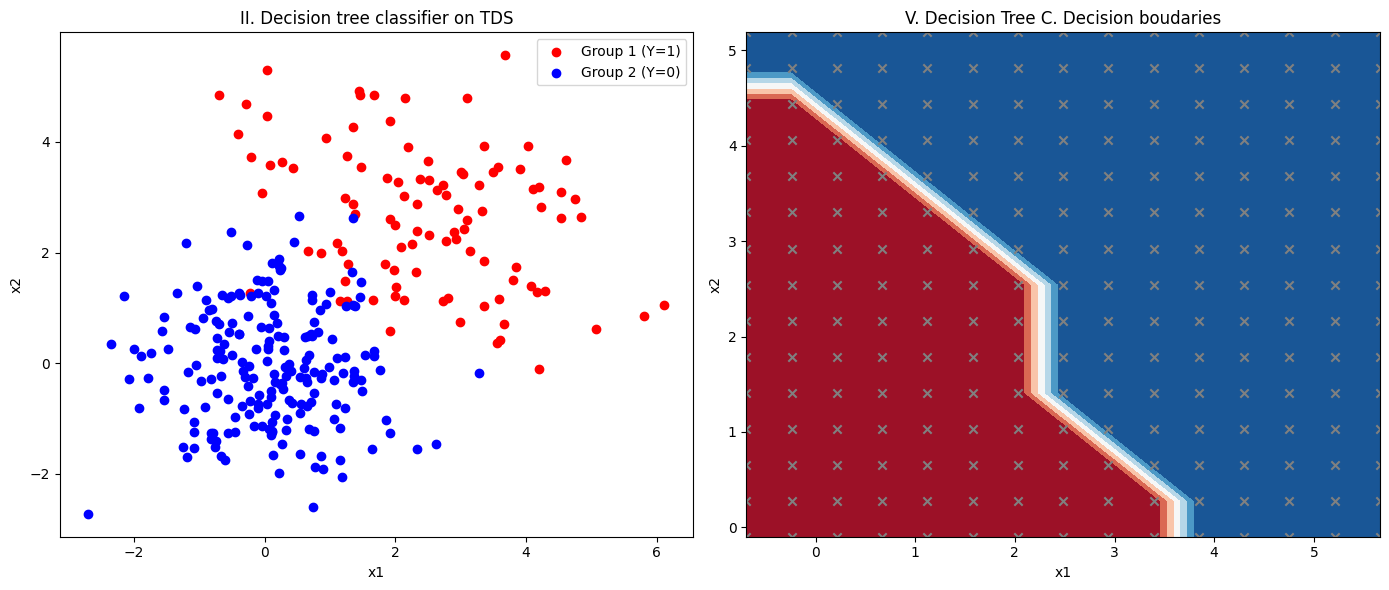

In [209]:
# -------------------- Create Grid for Decision Boundary --------------------
figure, axes = plt.subplots(1, 2, figsize=(14, 6))

# -------------------- Subplot 1: Training Data Set --------------------
ax1 = axes[0]
ax1.scatter(grp1[:, 0], grp1[:, 1], c="red", label="Group 1 (Y=1)")
ax1.scatter(grp2[:, 0], grp2[:, 1], c="blue", label="Group 2 (Y=0)")
ax1.set_title('II. Decision tree classifier on TDS')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.legend()

# -------------------- Subplot 2: Decision Boundaries --------------------
ax2 = axes[1]

# Determine the combined range for the grid based on both groups
x1_min, x1_max = min(grp1[:,0]), max(grp1[:,0])
x2_min, x2_max = min(grp1[:,1]), max(grp1[:,1])
# N grid 
Neval = 15

h1 = (x1_max - x1_min) / Neval
h2 = (x2_max - x2_min) / Neval

# Create a meshgrid for evaluation
x1Eval, x2Eval = np.meshgrid(np.arange(x1_min, x1_max, h1),
                             np.arange(x2_min, x2_max, h2))
xx1 = x1Eval.ravel()
xx2 = x2Eval.ravel()
Xgrid = np.column_stack((xx1, xx2))
# Predict the class for each grid point
pY_grid = exTree_fit.predict(Xgrid)
pY_grid = pY_grid.reshape(x1Eval.shape)

# Plot the decision boundary
ax2.contourf(x1Eval, x2Eval, pY_grid, cmap=plt.cm.RdBu)

# Plot the evaluation grid
ax2.scatter(Xgrid[:, 0], Xgrid[:, 1], marker='x', color='gray')
ax2.set_title('V. Decision Tree C. Decision boudaries')
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

# Rest

In [210]:
import pandas as pd
#Load the data
tab = pd.read_csv('data_Features.csv')
tabY = pd.read_csv('data_Targets.csv')

In [211]:
tab

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR
0,2013-01-01,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0
1,2013-01-02,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0
2,2013-01-03,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0
3,2013-01-04,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0
4,2013-01-05,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2551,2019-12-27,-27.316822,1.597207,-0.091400,-1.689860,95.102792,0.466891,0.462179,0.0,0.0,0.0
2552,2019-12-28,-27.998255,3.917396,0.498397,-1.690511,93.949257,0.466818,0.462108,0.0,0.0,0.0
2553,2019-12-29,-23.289798,4.664877,2.332191,-1.689860,93.989076,0.417442,0.414464,0.0,0.0,0.0
2554,2019-12-30,-25.674814,0.062261,3.760923,-1.689860,94.875746,0.306203,0.306203,0.0,0.0,0.0


In [212]:
tabY

,Unnamed: 0,Y1,Y3,Y4,Y5
0,2013-01-01,0,5,0,0
1,2013-01-02,0,0,0,0
2,2013-01-03,0,0,0,0
3,2013-01-04,0,2,0,0
4,2013-01-05,0,0,0,0
...,...,...,...,...,...
2551,2019-12-27,3,0,1,0
2552,2019-12-28,0,0,0,0
2553,2019-12-29,0,0,0,0
2554,2019-12-30,0,0,1,0
